<a href="https://colab.research.google.com/github/hrishi-kulkarni/MyAIAcademy/blob/master/perceptron_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_breast_cancer
import numpy as np

In [0]:
breast_cancer_data = load_breast_cancer()


In [0]:
x = breast_cancer_data.data
y = breast_cancer_data.target

In [4]:
print(x.shape, y.shape)

(569, 30) (569,)


In [7]:
type(y)

numpy.ndarray

In [0]:
import pandas as pd

In [10]:
df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
df['class'] = y

In [12]:
df['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

In [18]:
df.isnull().sum().sum()

0

In [19]:
df.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [0]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['class'])
Y = df['class']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 42)

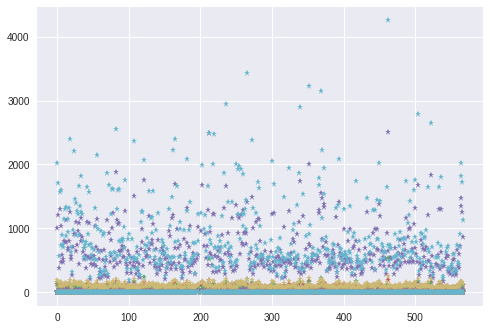

In [28]:
import matplotlib.pyplot as plt
plt.plot(x_train, '*');

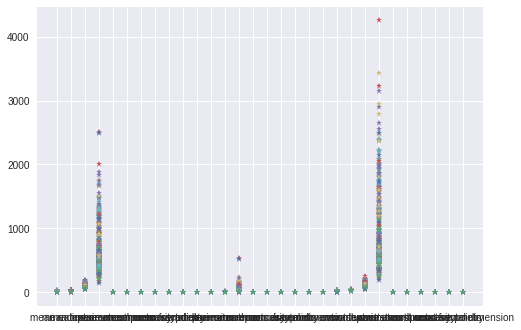

In [29]:
plt.plot(x_train.T, '*');

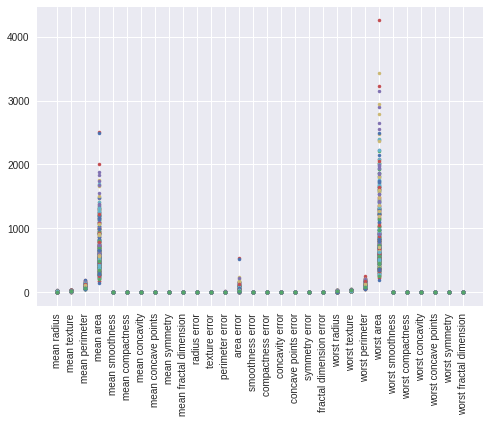

In [32]:
plt.plot(x_train.T, '.');
plt.xticks(rotation=90);

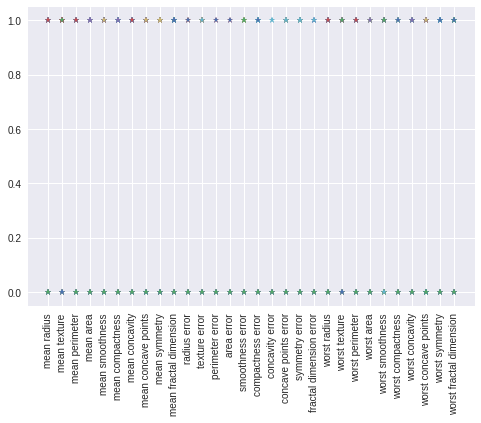

In [33]:
x_binarized_train = x_train.apply(pd.cut, bins=2, labels = [0,1])
plt.plot(x_binarized_train.T, '*')
plt.xticks(rotation=90);

In [0]:
x_binarized_test = x_test.apply(pd.cut, bins = 2, labels = [0,1])

In [0]:
x_binarized_train = x_binarized_train.values
x_binarized_test = x_binarized_test.values

In [36]:
type(x_binarized_test)

numpy.ndarray

In [0]:
from sklearn.metrics import accuracy_score
class MPNeuron:
  def __init__(self):
    self.b = None
  
  def model(self, X):
    return (sum(X)>=self.b)
  
  def predict(self, X):
    y = []
    for x in X:
      result = self.model(x)
      y.append(result)
    return np.array(y)
  
  def fit(self, X, y):
    accuracy = {}
    
    for b in range(1, x.shape[1] + 1):
      self.b = b
      y_pred = self.predict(X)
      accuracy[b] = 1 - accuracy_score(y_pred, y)
    #print(accuracy)  
    res_b = max(accuracy, key = accuracy.get)
    self.b = res_b
    
    print(self.b, '--->', accuracy[res_b])

In [49]:
mp_neuron = MPNeuron()
mp_neuron.fit(x_binarized_train, y_train)

4 ---> 0.861328125


In [50]:
y_test_pred = mp_neuron.predict(x_binarized_test)
1 - accuracy_score(y_test_pred, y_test)

0.8421052631578947

# Perceptron model

In [0]:
class Perceptron:
  def __init__(self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
  
  def predict(self, X):
    y = []
    for x in X:
      res = self.model(x)
      y.append(res)  
    return np.array(y)
  
  def fit(self, X, Y, epochs = 1):
    self.w = np.ones(X.shape[1])
    self.b = 0
    for i in range(epochs):
      for x,y in zip(X, Y):
        y_pred = self.model(x)
        if y==1 and y_pred==0:
          self.w += x
          self.b += 1
        elif y==0 and y_pred==1:
          self.w -= x
          self.b -= 1

In [0]:
perceptron = Perceptron()
x = breast_cancer_data.data
y = breast_cancer_data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, stratify = y, random_state = 42)
perceptron.fit(x_train, y_train, epochs = 2)

In [64]:
y_pred_test = perceptron.predict(x_test)
accuracy_score(y_pred_test, y_test)

0.8771929824561403

In [0]:
y_pred_test = perceptron